## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 2.เขียนโปรแกรมสำหรับสร้างตัวจำแนกแบบเบส์สำหรับการแจกแจงปรกติตัวแปรเดียว กรณีที่ความแปรปรวนของทั้งสองคลาสไม่เท่ากัน
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจก 
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

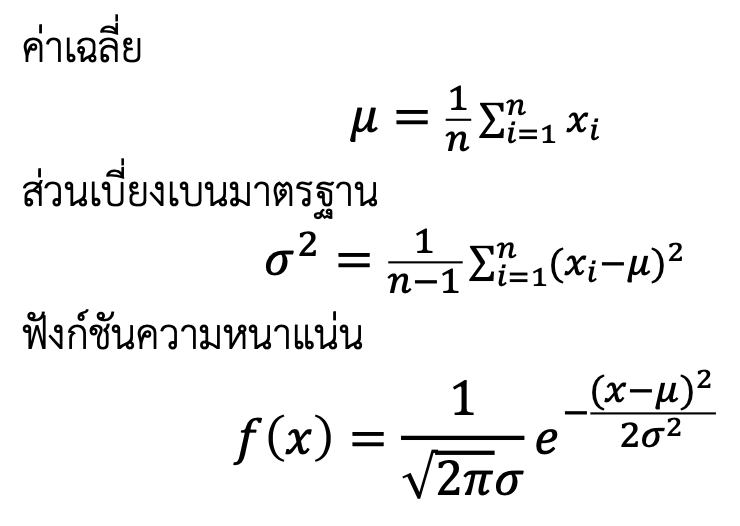
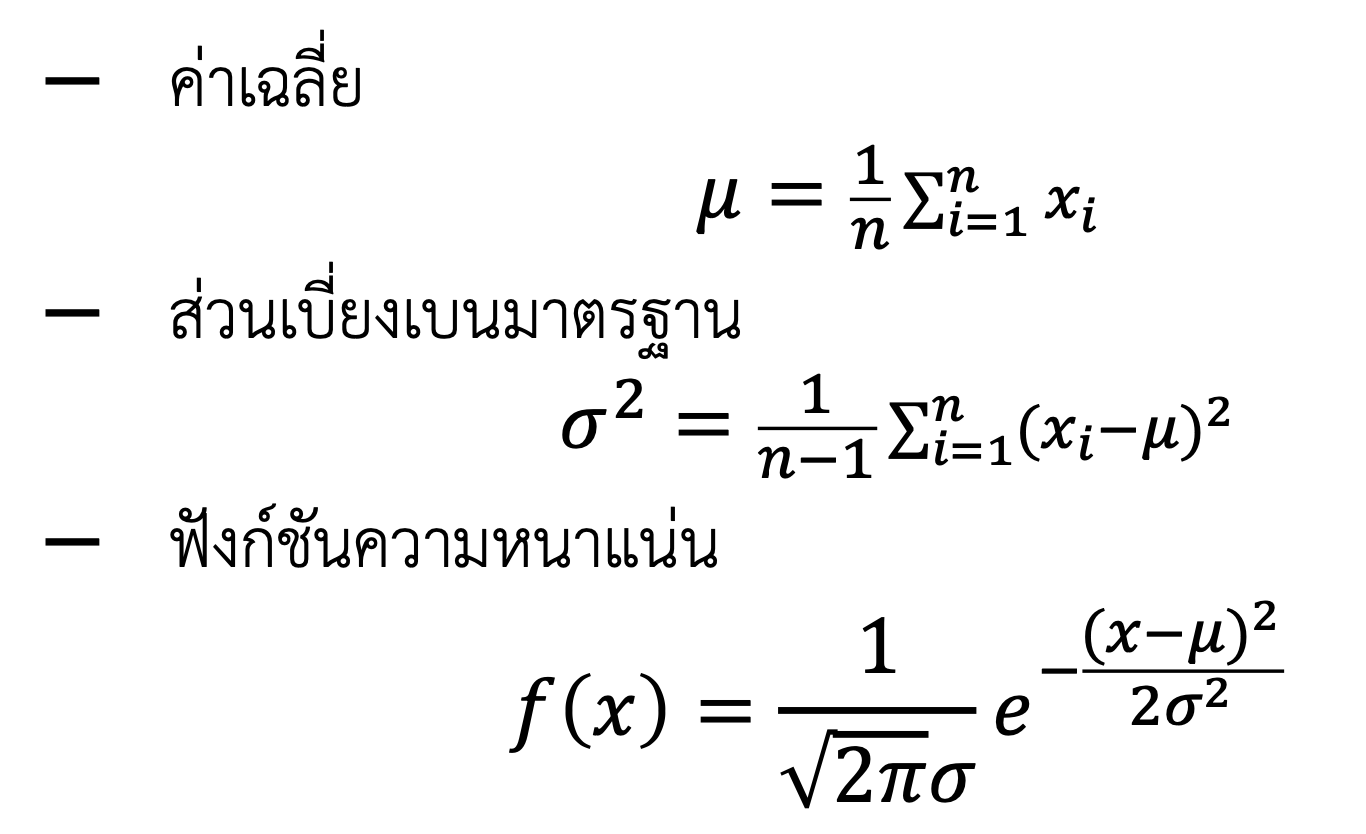
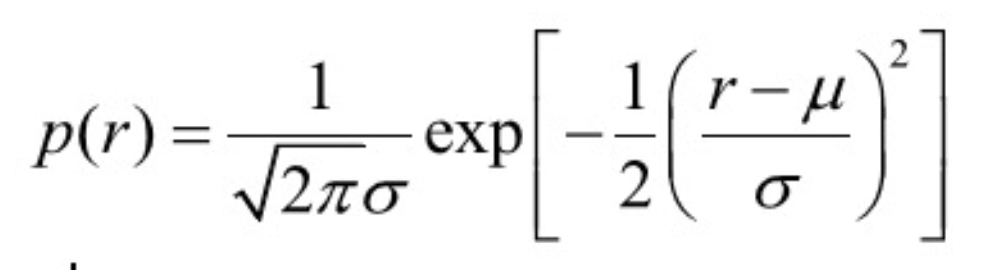

In [169]:
import numpy as np
import matplotlib.pyplot as plt

def Probability_density(x, mean, sigma):
    value = (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-(x - mean) ** 2 / (2 * sigma))
    return value

# sam1  = np.linspace(-7,7, 100)
# class1 = Probability_density(sam1)
# plt.plot(sam1, class1)

# sam2  = np.linspace(-3,16, 100)
# class2 = Probability_density(sam2, 3, 7)
# plt.plot(sam2, class2, color='red')
# plt.axis([-7, 18, -0, 0.25])

def calculate_priors(class1, class2):
    total_samples = len(class1) + len(class2)
    prior1 = len(class1) / total_samples
    prior2 = len(class2) / total_samples
    return prior1, prior2

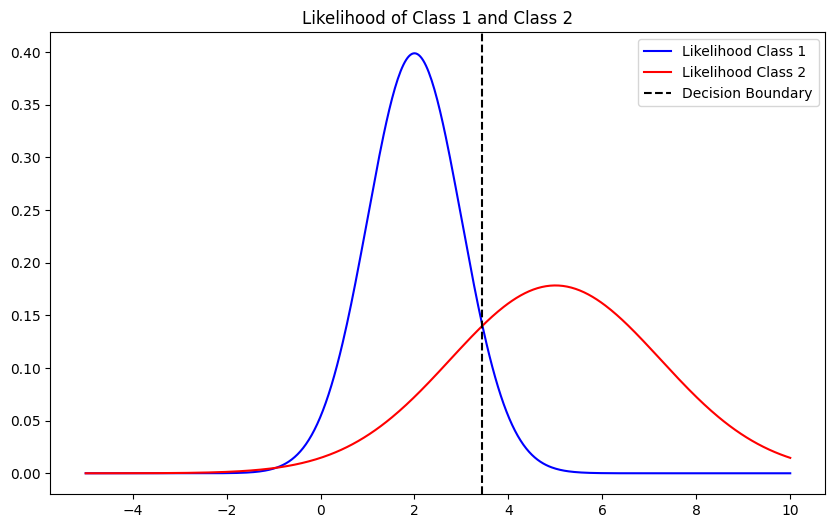

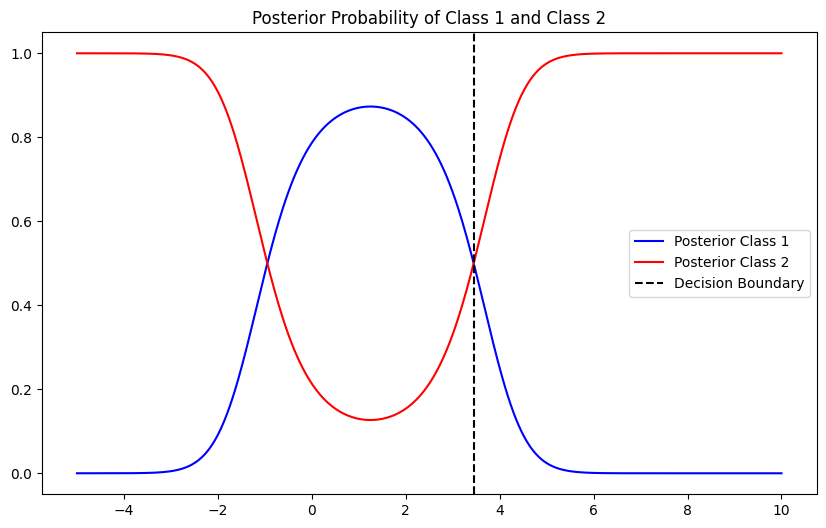

In [170]:

# กำหนดค่าพารามิเตอร์ของการแจกแจก
mean_class_1 = 2
var_class_1 = 1
mean_class_2 = 5
var_class_2 = 5
prior_class_1 = 0.5  # Prior probability for class 1
prior_class_2 = 0.5  # Prior probability for class 2

# สร้างข้อมูลแกน X
x_values = np.linspace(-5, 10, 500)

# คำนวณ likelihood (P(X|C)) สำหรับทั้งสองคลาส
likelihood_class_1 = Probability_density(x_values, mean_class_1, var_class_1)
likelihood_class_2 = Probability_density(x_values, mean_class_2, var_class_2)

# คำนวณ posterior (P(C|X)) สำหรับทั้งสองคลาส
posterior_class_1 = (likelihood_class_1 * prior_class_1) / (likelihood_class_1 * prior_class_1 + likelihood_class_2 * prior_class_2)
posterior_class_2 = (likelihood_class_2 * prior_class_2) / (likelihood_class_1 * prior_class_1 + likelihood_class_2 * prior_class_2)

# decision boundary
decision_boundary = x_values[np.abs(posterior_class_1 - posterior_class_2).argmin()]

# print(decision_boundary, decision_boundary2)
# Plot Likelihood
plt.figure(figsize=(10, 6))
plt.plot(x_values, likelihood_class_1, label='Likelihood Class 1', color='blue')
plt.plot(x_values, likelihood_class_2, label='Likelihood Class 2', color='red')
plt.axvline(x=decision_boundary, color='k', linestyle='--', label='Decision Boundary')
plt.title('Likelihood of Class 1 and Class 2')
plt.legend()
plt.show()

# Plot Posterior
plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_class_1, label='Posterior Class 1', color='blue')
plt.plot(x_values, posterior_class_2, label='Posterior Class 2', color='red')
plt.axvline(x=decision_boundary, color='k', linestyle='--', label='Decision Boundary')
plt.title('Posterior Probability of Class 1 and Class 2')
plt.legend()
plt.show()


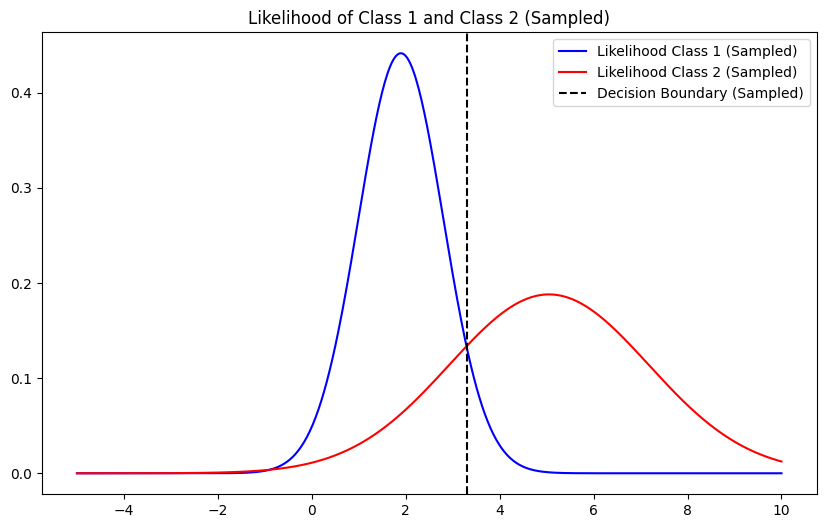

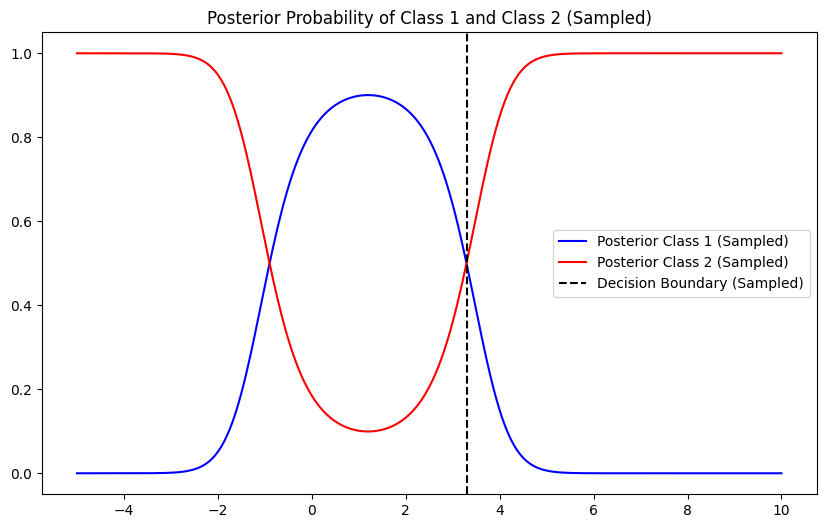

In [171]:
# สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 
np.random.seed(42)
# สุ่มตัวอย่างจากการแจกแจงปกติ
samples_class_1 = np.random.normal(mean_class_1, np.sqrt(var_class_1), 100)
samples_class_2 = np.random.normal(mean_class_2, np.sqrt(var_class_2), 100)

# คำนวณ mean และ variance จากตัวอย่างที่ได้
mean_class_1_sample = np.mean(samples_class_1)
var_class_1_sample = np.var(samples_class_1)
mean_class_2_sample = np.mean(samples_class_2)
var_class_2_sample = np.var(samples_class_2)

# คำนวณ likelihood จากพารามิเตอร์ที่ได้จากการสุ่มตัวอย่าง
likelihood_class_1_sample = Probability_density(x_values, mean_class_1_sample, var_class_1_sample)
likelihood_class_2_sample = Probability_density(x_values, mean_class_2_sample, var_class_2_sample)

# คำนวณ posterior จากพารามิเตอร์ที่ได้จากการสุ่มตัวอย่าง
prior_class_1, prior_class_2 = calculate_priors(samples_class_1, samples_class_2)
posterior_class_1_sample = (likelihood_class_1_sample * prior_class_1) / (likelihood_class_1_sample * prior_class_1 + likelihood_class_2_sample * prior_class_2)
posterior_class_2_sample = (likelihood_class_2_sample * prior_class_2) / (likelihood_class_1_sample * prior_class_1 + likelihood_class_2_sample * prior_class_2)

# หาจุด decision boundary จากตัวอย่างที่สุ่ม
decision_boundary_sample = x_values[np.abs(posterior_class_1_sample - posterior_class_2_sample).argmin()]

# Plot Likelihood ที่ได้จากการสุ่มตัวอย่าง
plt.figure(figsize=(10, 6))
plt.plot(x_values, likelihood_class_1_sample, label='Likelihood Class 1 (Sampled)', color='blue')
plt.plot(x_values, likelihood_class_2_sample, label='Likelihood Class 2 (Sampled)', color='red')
plt.axvline(x=decision_boundary_sample, color='k', linestyle='--', label='Decision Boundary (Sampled)')
plt.title('Likelihood of Class 1 and Class 2 (Sampled)')
plt.legend()
plt.show()

# Plot Posterior ที่ได้จากการสุ่มตัวอย่าง
plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_class_1_sample, label='Posterior Class 1 (Sampled)', color='blue')
plt.plot(x_values, posterior_class_2_sample, label='Posterior Class 2 (Sampled)', color='red')
plt.axvline(x=decision_boundary_sample, color='k', linestyle='--', label='Decision Boundary (Sampled)')
plt.title('Posterior Probability of Class 1 and Class 2 (Sampled)')
plt.legend()
plt.show()